<a href="https://colab.research.google.com/github/tushar-badlani/nnfl-project/blob/main/EVsales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:
df.shape

(177866, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
# prompt: number of unique values in each column

df.nunique()


VIN (1-10)                                            10830
County                                                  196
City                                                    723
State                                                    46
Postal Code                                             862
Model Year                                               22
Make                                                     40
Model                                                   139
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       177866
Vehicle Location                                        861
Electric Utility                                         76
2020 Census Tract                       

We can see that there are 133 models in our database

In [ ]:
ev_counts_by_make = df['Make'].value_counts().nlargest(20)
print(ev_counts_by_make)

Make
TESLA            79659
NISSAN           13998
CHEVROLET        13678
FORD              9199
BMW               7570
KIA               7432
TOYOTA            6288
VOLKSWAGEN        5004
JEEP              4480
HYUNDAI           4406
RIVIAN            4312
VOLVO             4133
AUDI              3646
CHRYSLER          2993
MERCEDES-BENZ     1589
PORSCHE           1139
MITSUBISHI         958
MINI               898
POLESTAR           882
HONDA              833
Name: count, dtype: int64


Tesla is by far the largest maker of EV.

<ipython-input-8-38a1d61288ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")


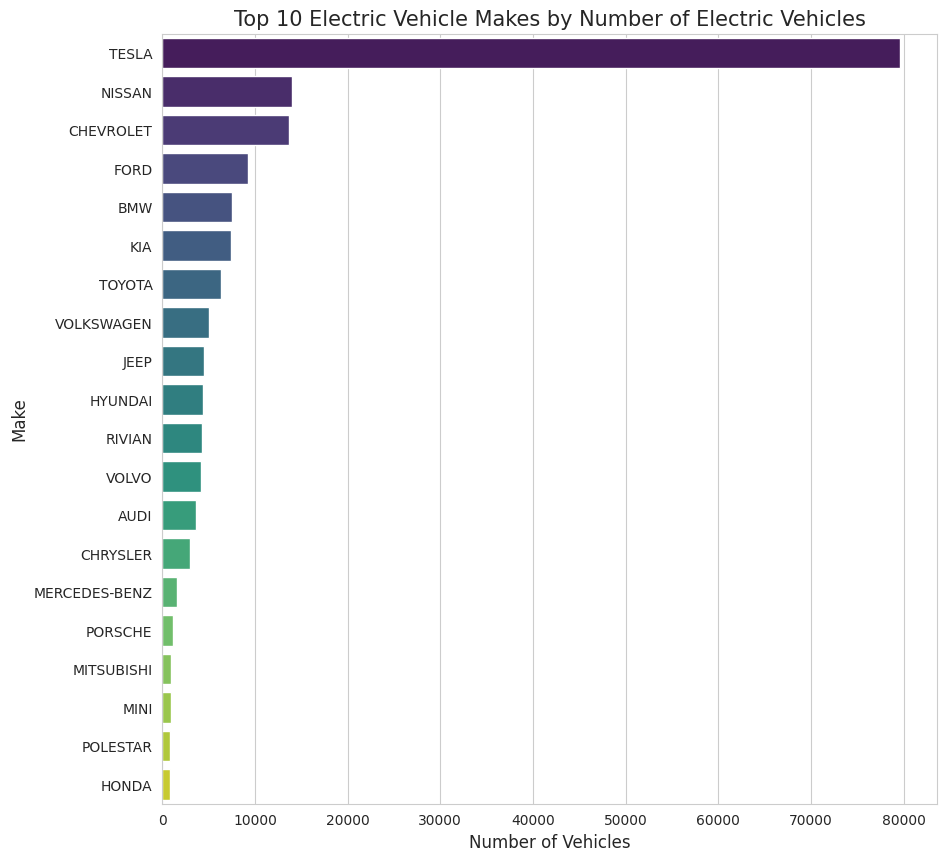

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(x=ev_counts_by_make.values, y=ev_counts_by_make.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles', fontsize=15)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.show()

In [ ]:
ev_counts_by_model = df['Model'].value_counts().nlargest(25)
print(ev_counts_by_model)

Model
MODEL Y           35989
MODEL 3           30092
LEAF              13366
MODEL S            7735
BOLT EV            6821
MODEL X            5796
VOLT               4796
ID.4               3937
WRANGLER           3392
MUSTANG MACH-E     3322
NIRO               3150
PACIFICA           2993
PRIUS PRIME        2736
IONIQ 5            2432
X5                 2412
RAV4 PRIME         2191
EV6                2155
R1S                2092
I3                 1925
FUSION             1793
BOLT EUV           1772
R1T                1714
F-150              1614
C-MAX              1497
XC90               1421
Name: count, dtype: int64


Models Y and 3 are very popular

<ipython-input-10-441c8cd9ad86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_counts_by_model.values, y=ev_counts_by_model.index, palette="viridis")


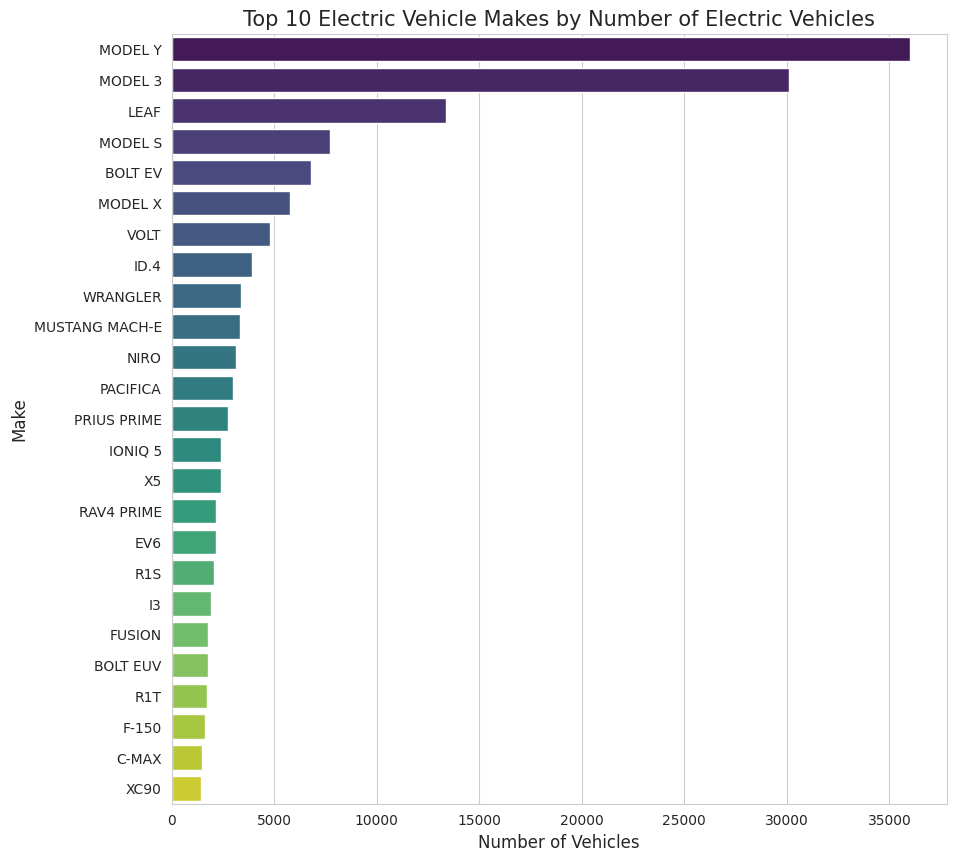

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 10))
sns.barplot(x=ev_counts_by_model.values, y=ev_counts_by_model.index, palette="viridis")
plt.title('Top 10 Electric Vehicle Makes by Number of Electric Vehicles', fontsize=15)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.show()

Number of models by each company

In [ ]:
make = df.groupby('Model')['Make'].unique()
make = make.value_counts().sort_values(ascending=False)
print(make)

Make
[BMW]                     14
[AUDI]                    12
[MERCEDES-BENZ]           10
[HYUNDAI]                  8
[KIA]                      8
[FORD]                     8
[CHEVROLET]                7
[VOLVO]                    7
[TOYOTA]                   6
[TESLA]                    5
[PORSCHE]                  4
[GENESIS]                  3
[SMART]                    3
[RIVIAN]                   3
[CADILLAC]                 3
[JEEP]                     2
[MAZDA]                    2
[VOLKSWAGEN]               2
[BENTLEY]                  2
[LINCOLN]                  2
[MITSUBISHI]               2
[FISKER]                   2
[SUBARU]                   2
[LEXUS]                    2
[LAND ROVER]               2
[NISSAN]                   2
[MINI]                     2
[HONDA]                    2
[POLESTAR]                 1
[AZURE DYNAMICS]           1
[ALFA ROMEO]               1
[ROLLS ROYCE]              1
[TH!NK]                    1
[LUCID]                    1
[CHRYSLER

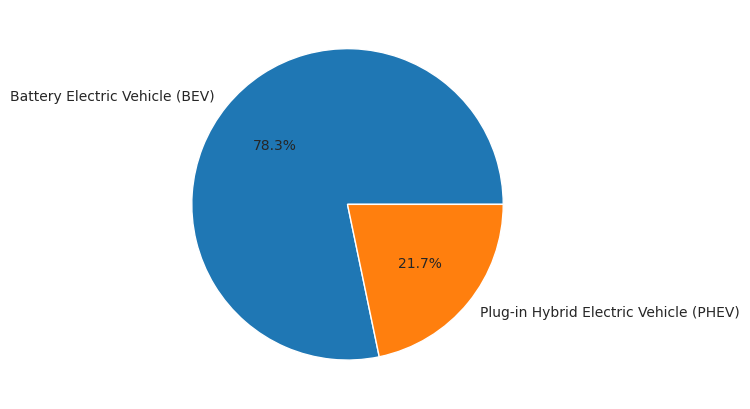

In [ ]:
df['Electric Vehicle Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

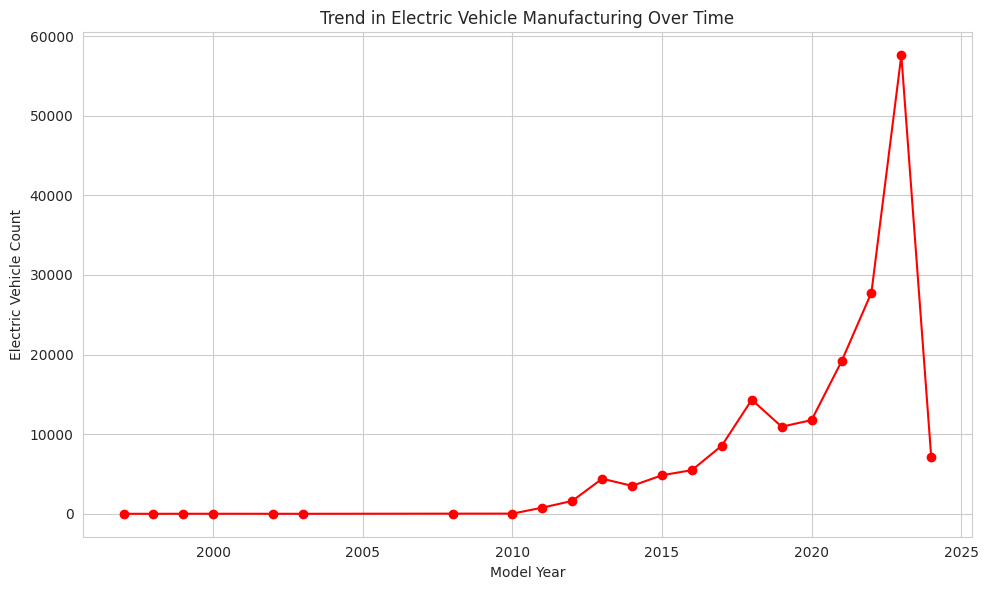

In [ ]:
yearly_counts = df.groupby('Model Year').size().reset_index(name='Electric Vehicle Count')

# Plot the trend in electric vehicle manufacturing over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['Model Year'], yearly_counts['Electric Vehicle Count'], marker='o', color='red')
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Count')
plt.title('Trend in Electric Vehicle Manufacturing Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


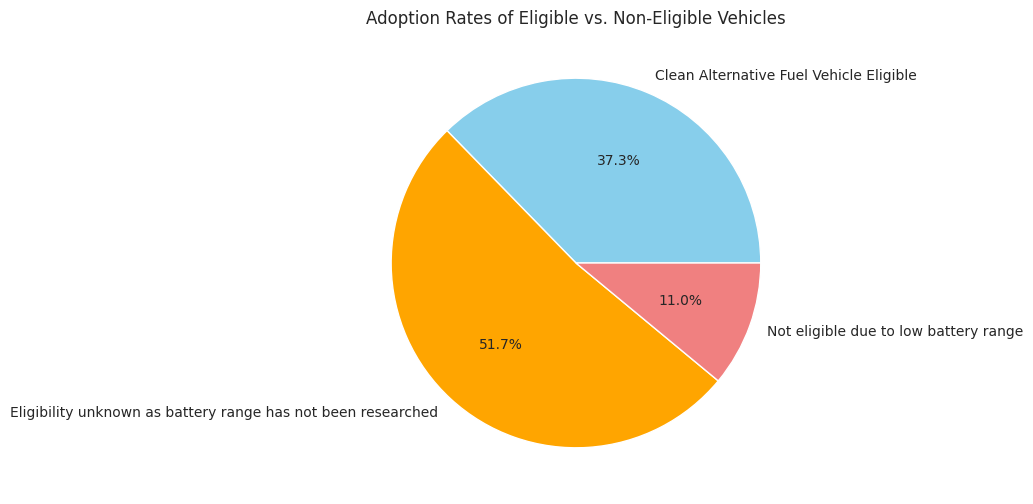

In [ ]:
eligible_vehicles = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Yes']

# Group by eligibility status and count the number of vehicles
eligibility_counts = df.groupby('Clean Alternative Fuel Vehicle (CAFV) Eligibility').size()

# Plot the comparison of adoption rates between eligible and non-eligible vehicles
plt.figure(figsize=(8, 6))
eligibility_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','orange', 'lightcoral'])
plt.title('Adoption Rates of Eligible vs. Non-Eligible Vehicles')
plt.ylabel('')
plt.show()

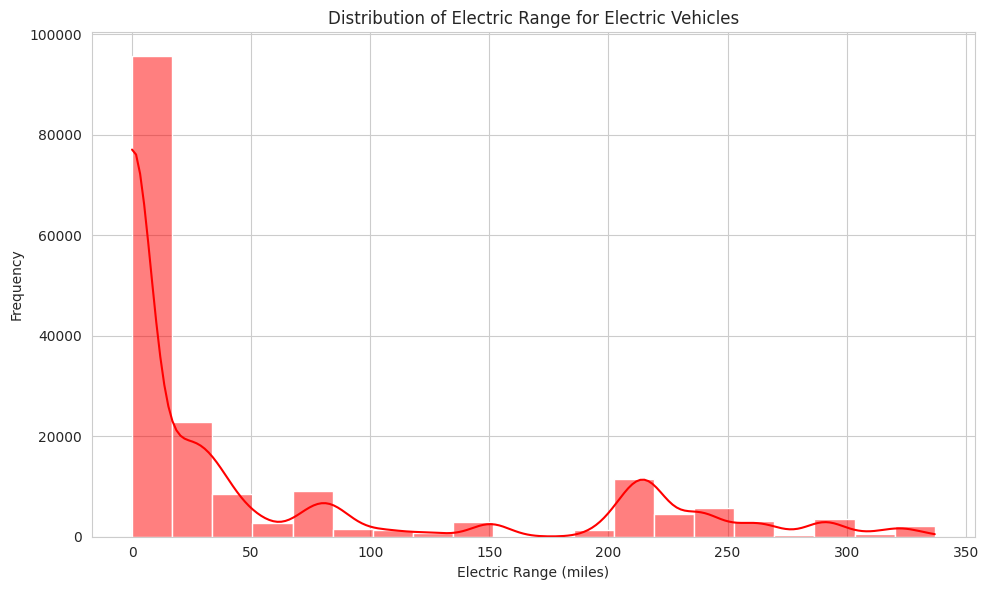

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=20, kde=True, color='red')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range for Electric Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: find the model that has electic range > 200

high_range =df[df['Electric Range'] > 200]['Model'].unique()

for i in high_range:
  print(i)


MODEL Y
MODEL S
MODEL 3
E-TRON
NIRO
LEAF
KONA
MODEL X
BOLT EV
I-PACE
E-TRON SPORTBACK
TAYCAN
PS2
ROADSTER


In [ ]:
# prompt: for all models in high_range find total number of rows

high_range_count = 0
for model in high_range:
  high_range_count += df[df['Model'] == model].shape[0]

print(f"Total number of rows for models with range > 200 miles: {high_range_count}")


Total number of rows for models with range > 200 miles: 106253


In [30]:
prices = [
    44630, 46990, 30000, 74990, 32495,
    81630, 34395, 41160, 50000, 39895,
    40975, 39995, 32975, 41800, 80000,
    43690, 43975, 78000, 50000, 37000,
    27800, 73000, 40000, 28000, 71900
]

In [31]:
# prompt: for each value in ev_count_by_model find their type
i=0
for model, count in ev_counts_by_model.items():
  ev_type = df[df['Model'] == model]['Electric Vehicle Type'].values[0]
  range = df[df['Model'] == model]['Electric Range'].values[0]
  print(f"Model: {model}, Count: {count}, Type: {ev_type}, Range = {range}, Price = {prices[i]}")
  i+=1

#Bolt Ev has range of 259

Model: MODEL Y, Count: 35989, Type: Battery Electric Vehicle (BEV), Range = 291, Price = 44630
Model: MODEL 3, Count: 30092, Type: Battery Electric Vehicle (BEV), Range = 322, Price = 46990
Model: LEAF, Count: 13366, Type: Battery Electric Vehicle (BEV), Range = 75, Price = 30000
Model: MODEL S, Count: 7735, Type: Battery Electric Vehicle (BEV), Range = 270, Price = 74990
Model: BOLT EV, Count: 6821, Type: Battery Electric Vehicle (BEV), Range = 0, Price = 32495
Model: MODEL X, Count: 5796, Type: Battery Electric Vehicle (BEV), Range = 238, Price = 81630
Model: VOLT, Count: 4796, Type: Plug-in Hybrid Electric Vehicle (PHEV), Range = 38, Price = 34395
Model: ID.4, Count: 3937, Type: Battery Electric Vehicle (BEV), Range = 0, Price = 41160
Model: WRANGLER, Count: 3392, Type: Plug-in Hybrid Electric Vehicle (PHEV), Range = 25, Price = 50000
Model: MUSTANG MACH-E, Count: 3322, Type: Battery Electric Vehicle (BEV), Range = 0, Price = 39895
Model: NIRO, Count: 3150, Type: Plug-in Hybrid Elec

Top 6 most popular are BEVs and have high range except leaf

In [60]:
# prompt: generate a csv file with range, count, type, and model name for all models in ev_counts_by_model

import csv

# Create a CSV file with the columns: Range, Count, Type, Model
with open('ev_data.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['Range', 'Count', 'Type', 'Model', 'Model_Year', 'Price', 'Make'])

  i=0
  # Iterate through the top 25 models by count
  for model, count in ev_counts_by_model.items():
    # Get the electric vehicle type and range for the current model
    ev_type = df[df['Model'] == model]['Electric Vehicle Type'].values[0]
    range = df[df['Model'] == model]['Electric Range'].values[0]
    year = df[df['Model'] == model]['Model Year'].values[0]
    price = prices[i]
    make = df[df['Model']==model]['Make'].values[0]
    i+=1
    # Write the data for the current model to the CSV file
    writer.writerow([range, count, ev_type, model,year, price, make])

print('CSV file successfully generated!')


CSV file successfully generated!


In [61]:
df1 = pd.read_csv("/content/ev_data.csv")
df1.head()

,Range,Count,Type,Model,Model_Year,Price,Make
0,291,35989,Battery Electric Vehicle (BEV),MODEL Y,2020,44630,TESLA
1,322,30092,Battery Electric Vehicle (BEV),MODEL 3,2020,46990,TESLA
2,75,13366,Battery Electric Vehicle (BEV),LEAF,2013,30000,NISSAN
3,270,7735,Battery Electric Vehicle (BEV),MODEL S,2019,74990,TESLA
4,0,6821,Battery Electric Vehicle (BEV),BOLT EV,2021,32495,CHEVROLET


In [62]:
df1.loc[df1['Model'] == 'BOLT EV', 'Range'] = 259
df1.loc[df1['Model'] == 'ID.4', 'Range'] = 275
df1.loc[df1['Model'] == 'MUSTANG MACH-E', 'Range'] = 300
df1.loc[df1['Model'] == 'IONIQ 5', 'Range'] = 303
df1.loc[df1['Model'] == 'EV6', 'Range'] = 300
df1.loc[df1['Model'] == 'R1S', 'Range'] = 321
df1.loc[df1['Model'] == 'BOLT EUV', 'Range'] = 247
df1.loc[df1['Model'] == 'R1T', 'Range'] = 314
df1.loc[df1['Model'] == 'F-150', 'Range'] = 240

In [63]:
df1.head(25)

,Range,Count,Type,Model,Model_Year,Price,Make
0,291,35989,Battery Electric Vehicle (BEV),MODEL Y,2020,44630,TESLA
1,322,30092,Battery Electric Vehicle (BEV),MODEL 3,2020,46990,TESLA
2,75,13366,Battery Electric Vehicle (BEV),LEAF,2013,30000,NISSAN
3,270,7735,Battery Electric Vehicle (BEV),MODEL S,2019,74990,TESLA
4,259,6821,Battery Electric Vehicle (BEV),BOLT EV,2021,32495,CHEVROLET
5,238,5796,Battery Electric Vehicle (BEV),MODEL X,2018,81630,TESLA
6,38,4796,Plug-in Hybrid Electric Vehicle (PHEV),VOLT,2013,34395,CHEVROLET
7,275,3937,Battery Electric Vehicle (BEV),ID.4,2023,41160,VOLKSWAGEN
8,25,3392,Plug-in Hybrid Electric Vehicle (PHEV),WRANGLER,2021,50000,JEEP
9,300,3322,Battery Electric Vehicle (BEV),MUSTANG MACH-E,2021,39895,FORD


<Axes: xlabel='Model_Year', ylabel='Price'>

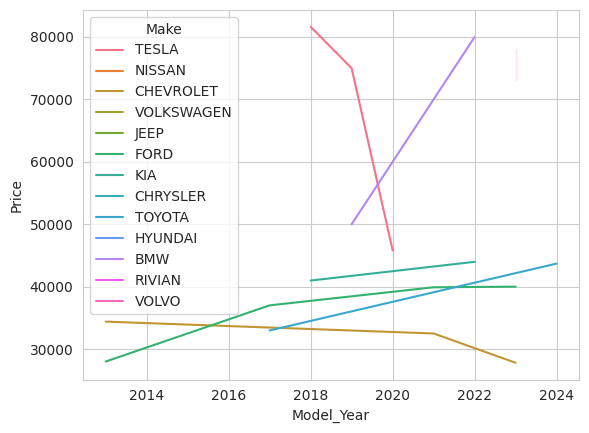

In [85]:
# @title Price vs Model Year

sns.lineplot(data=df1, x="Model_Year", y="Price", hue="Make")

Tesla reducing prices whereas a lot of other companies increasing prices

<Axes: title={'center': 'Range'}, xlabel='Type'>

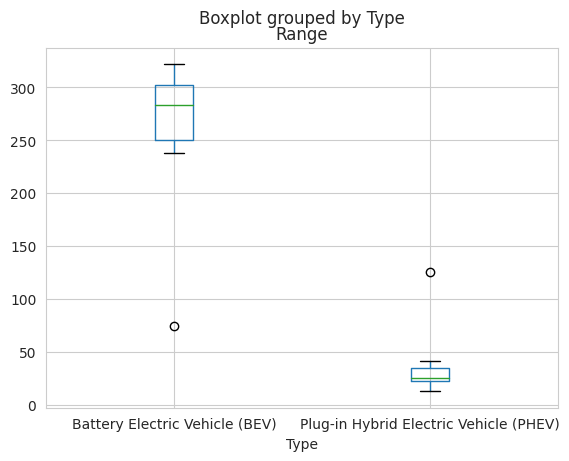

In [64]:
# @title Average Range by Vehicle Type

df1.boxplot(column='Range', by='Type')

<ipython-input-65-fb750b413615>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df1, x='Range', y='Type', inner='stick', palette='Dark2')


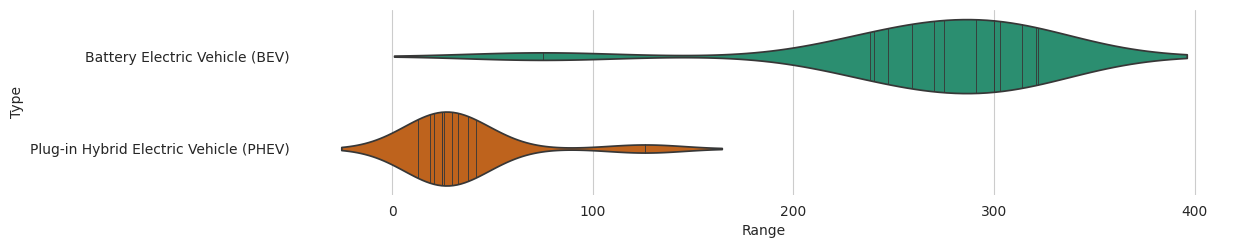

In [65]:
# @title Type vs Range

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1, x='Range', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

We can clearly see BEVs have higher range than PHEVs

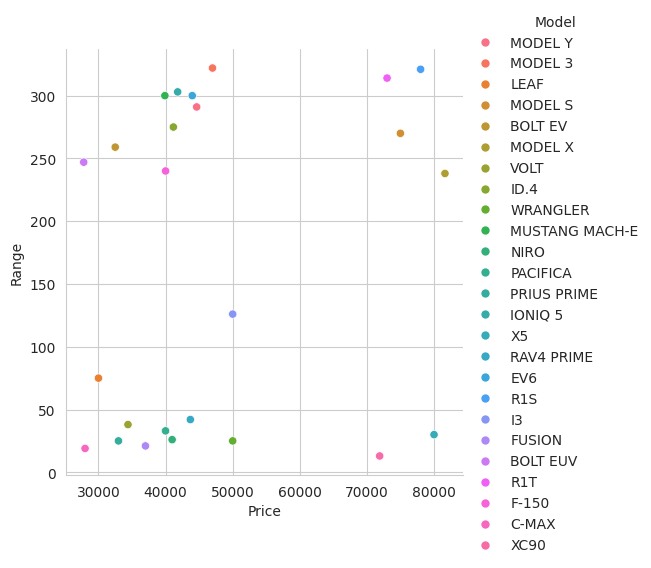

In [66]:
# prompt: draw a plot of range vs price for each model

import matplotlib.pyplot as plt
sns.relplot(x="Price", y="Range", hue="Model", data=df1)
plt.show()


In [67]:
# prompt: find models with range >200 and price < 50000

filtered_models = df1[(df1['Range'] > 200) & (df1['Price'] < 50000)]

print(filtered_models)


    Range  Count                            Type           Model  Model_Year  \
0     291  35989  Battery Electric Vehicle (BEV)         MODEL Y        2020   
1     322  30092  Battery Electric Vehicle (BEV)         MODEL 3        2020   
4     259   6821  Battery Electric Vehicle (BEV)         BOLT EV        2021   
7     275   3937  Battery Electric Vehicle (BEV)            ID.4        2023   
9     300   3322  Battery Electric Vehicle (BEV)  MUSTANG MACH-E        2021   
13    303   2432  Battery Electric Vehicle (BEV)         IONIQ 5        2023   
16    300   2155  Battery Electric Vehicle (BEV)             EV6        2022   
20    247   1772  Battery Electric Vehicle (BEV)        BOLT EUV        2023   
22    240   1614  Battery Electric Vehicle (BEV)           F-150        2023   

    Price        Make  
0   44630       TESLA  
1   46990       TESLA  
4   32495   CHEVROLET  
7   41160  VOLKSWAGEN  
9   39895        FORD  
13  41800     HYUNDAI  
16  43975         KIA  
20  278

3/5 of top vehicles have high range and low price

In [68]:
# prompt: find models with range < 50 and price > 70000

models_with_range_less_than_50_and_price_greater_than_70000 = df1[
    (df1["Range"] < 50) & (df1["Price"] > 70000)
]

print(models_with_range_less_than_50_and_price_greater_than_70000)


    Range  Count                                    Type Model  Model_Year  \
14     30   2412  Plug-in Hybrid Electric Vehicle (PHEV)    X5        2022   
24     13   1421  Plug-in Hybrid Electric Vehicle (PHEV)  XC90        2016   

    Price   Make  
14  80000    BMW  
24  71900  VOLVO  


Intrestingly, X5 BMW and XC90 Volvo manage to make it into top 25 despite having low range and high price


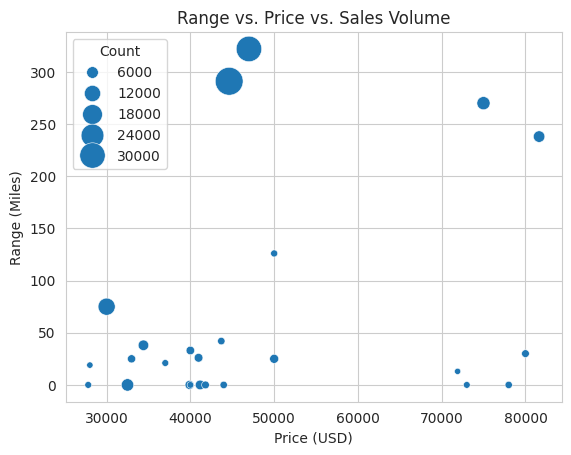

In [84]:
# prompt: range vs price vs sales

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data into a pandas dataframe
df = pd.read_csv("/content/ev_data.csv")

# Create a scatter plot with range on the x-axis, price on the y-axis, and sales volume represented by the size of the marker
sns.scatterplot(data=df, x="Price", y="Range", size="Count", sizes=(20, 400))

# Set the title and axis labels
plt.title("Range vs. Price vs. Sales Volume")
plt.xlabel("Price (USD)")
plt.ylabel("Range (Miles)")

# Show the plot
plt.show()


In [97]:
# prompt: replace bhev to 1 and phev to 0

df1['Type'] = df1['Type'].replace('Battery Electric Vehicle (BEV)', 1)
df1['Type'] = df1['Type'].replace('Plug-in Hybrid Electric Vehicle (PHEV)', 0)
df1.head()


,Range,Count,Type,Model,Model_Year,Price,Make
0,291,35989,1,MODEL Y,2020,44630,TESLA
1,322,30092,1,MODEL 3,2020,46990,TESLA
2,75,13366,1,LEAF,2013,30000,NISSAN
3,270,7735,1,MODEL S,2019,74990,TESLA
4,259,6821,1,BOLT EV,2021,32495,CHEVROLET


In [138]:
# prompt: scale value of count to 0 to 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1['Count_scaled'] = scaler.fit_transform(df1['Count'].values.reshape(-1, 1))
df1['Price_scaled'] = scaler.fit_transform(df1['Price'].values.reshape(-1, 1))

df1.head()


,Range,Count,Type,Model,Model_Year,Price,Make,Count_scaled,Price_scaled
0,291,35989,1,MODEL Y,2020,44630,TESLA,1.000000,0.312651
1,322,30092,1,MODEL 3,2020,46990,TESLA,0.829409,0.356493
2,75,13366,1,LEAF,2013,30000,NISSAN,0.345551,0.040869
3,270,7735,1,MODEL S,2019,74990,TESLA,0.182654,0.876649
4,259,6821,1,BOLT EV,2021,32495,CHEVROLET,0.156214,0.087219


In [146]:
# prompt: implement a neural network for predicting price

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
df = pd.read_csv("/content/ev_data.csv")

# Preprocess the data
X = df1[["Range", "Type", "Price_scaled", "Model_Year"]]
y = df1["Count_scaled"]

X = pd.get_dummies(X, columns=["Type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse)



Epoch 1/50
2/2 [==============================] - 1s 10ms/step - loss: 0.0417
Epoch 2/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0251
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0190
Epoch 4/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0172
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0127
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0109
Epoch 8/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0102
Epoch 9/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0082
Epoch 11/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 12/50
2/2 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 13/50
2/2 [==============================] - 0s 7ms/step - loss: 